In [31]:
import pandas as pd 
import numpy as np
import json
import string
import re

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams["figure.figsize"]= (20,10)

stopwords = nltk.corpus.stopwords.words('english')

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

<IPython.core.display.Javascript object>

In [32]:
with open('data_science_profiles.json') as json_file:
    data_science_profiles = json.load(json_file)

data_science_profiles_df = pd.DataFrame.from_dict(data_science_profiles)

In [33]:
def clean_text2(txt):
    txt = ''.join([wrd.lower() for wrd in txt if wrd not in string.punctuation])
    tokens = re.split('\W+', txt)
    tokens = [wrd for wrd in tokens if wrd not in stopwords]
    return tokens

In [34]:
data_science_profiles_df['skills'] = data_science_profiles_df['skills'].apply(lambda x: ' '.join([word.lower() for word in x]))
data_science_profiles_df['certifications'] = data_science_profiles_df['certifications'].apply(lambda x: ' '.join([word.lower() for word in x]))
data_science_profiles_df['skills'] = data_science_profiles_df['skills'].apply(lambda x: clean_text2(x))
data_science_profiles_df['certifications'] = data_science_profiles_df['certifications'].apply(lambda x: clean_text2(x))

In [35]:
temp  = pd.get_dummies(data_science_profiles_df['skills'].apply(pd.Series).stack()).sum(level=0)
temp2 = pd.get_dummies(data_science_profiles_df['certifications'].apply(pd.Series).stack()).sum(level=0)
temp = pd.concat([temp, temp2], axis=1)

In [36]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(temp)
    sse.append(km.inertia_)

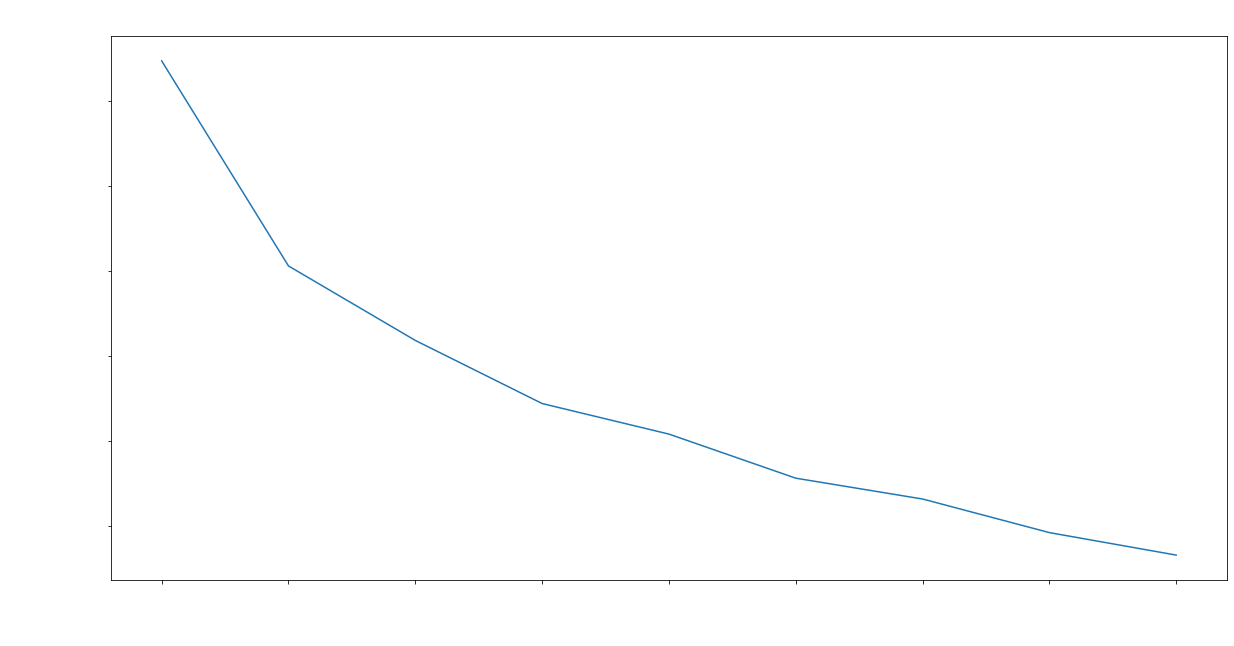

In [37]:
plt.title('Elbow', color='w', size=30)
plt.xlabel('K', color='w', size=30)
plt.ylabel('Sum of squared error', color='w', size=30)
plt.xticks(color='w', size=20)
plt.yticks(color='w', size=20)
plt.plot(k_rng,sse)
plt.show()

In [38]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(temp)

In [39]:
pca = PCA(n_components=3)
pca_trans = pca.fit_transform(temp)

In [40]:
pca_trans_df = pd.DataFrame(pca_trans)

In [41]:
df_concat = pd.concat([pca_trans_df, data_science_profiles_df['job_titles']], axis=1)

In [42]:
df_concat['cluster']=y_predicted
df_concat

,0,1,2,job_titles,cluster
0,-2.043648,-2.143441,-1.700266,Data Scientist,0
1,4.058399,2.578237,-0.778469,Data Scientist,1
2,5.279279,2.272839,0.560904,Data Science Analyst | Accenture Digital,1
3,2.145107,1.763709,0.317817,Data Analytics Consultant,1
4,-0.389651,1.195374,-1.444254,Data Scientist | Senior Associate,0
...,...,...,...,...,...
398,-0.663295,-0.931799,-0.539720,Senior Data Scientist,0
399,2.430413,0.222706,0.703195,Data Engineer,1
400,-0.918159,0.618134,1.492359,Fulbright Postgraduate Scholar - Elsevier Awar...,0
401,-0.707375,1.119209,1.260546,"Principal, Head of Data Science UK",0


No handles with labels found to put in legend.


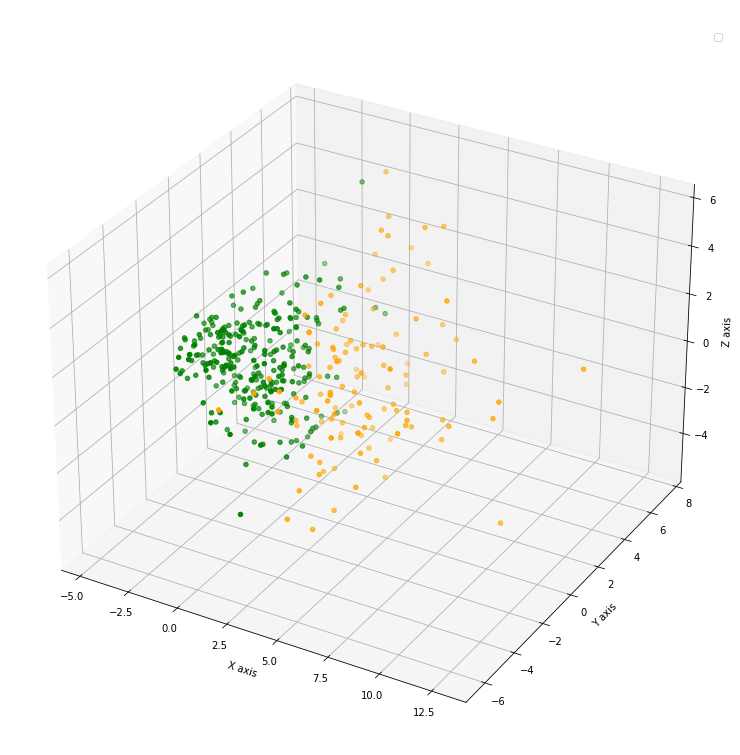

In [112]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
df1 = df_concat[df_concat.cluster==0]
df2 = df_concat[df_concat.cluster==1]
ax.scatter(df1[0],df1[1],df1[2],color='green')
ax.scatter(df2[0],df2[1],df2[2],color='orange')
# ax.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.title('3D visualisation of Clusters', color='white', fontsize=20)
plt.legend()
plt.show()